In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import umap
from sklearn.manifold import TSNE
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import pandas as pd
import adjustText
import random
import os

random.seed(1408)
ADJUST_TEXT_FLAG = True

In [2]:
gaussian_cor_embedding = np.load(os.path.join("..", "MPNN", "results", "embedding", "embedding_gaussian_cor.npy"))
mean_cor_embedding = np.load(os.path.join("..", "MPNN", "results", "embedding", "embedding_mean_cor.npy"))

In [3]:
ATOM_TO_INT = pd.read_csv(os.path.join("..", "atom_to_int.csv"))
INT_TO_ATOM = {}
for row in ATOM_TO_INT.iterrows():
    INT_TO_ATOM[row[1]['second']] = row[1]['first']

### Choose what embedding to use:

In [4]:
embedding_to_use = gaussian_cor_embedding
#embedding_to_use = mean_cor_embedding

## Lets create a few color encodings

### By periodic table groups

In [5]:
embedding_to_use.shape

(74, 10)

In [6]:
ptable_groups = {1: ['H', 'Li', 'Na', 'K', 'Rb', 'Cs', 'Fr'], 
                 2: ['Be', 'Mg', 'Ca', 'Sr', 'Ba', 'Ra'], 
                 3: ['Sc', 'Y', 'La', 'Ac'], 
                 4: ['Ti', 'Zr', 'Hf', 'Rf'], 
                 5: ['V', 'Nb', 'Ta', 'Db'],
                 6: ['Cr', 'Mo', 'W', 'Sg'], 
                 7: ['Mn', 'Tc', 'Re', 'Bh'], 
                 8: ['Fe', 'Ru', 'Os', 'Hs'], 
                 9: ['Co', 'Rh', 'Ir', 'Mt'], 
                 10: ['Ni', 'Pd', 'Pt', 'Ds'], 
                 11: ['Cu', 'Ag', 'Au', 'Rg'],
                 12: ['Zn', 'Cd', 'Hg', 'Cn'], 
                 13: ['B', 'Al', 'Ga', 'In', 'Tl', 'Nh'], 
                 14: ['C', 'Si', 'Ge', 'Sn', 'Pb', 'Fl'], 
                 15: ['N', 'P', 'As', 'Sb', 'Bi', 'Mc'],
                 16: ['O', 'S', 'Se', 'Te', 'Po', 'Lv'], 
                 17: ['F', 'Cl', 'Br', 'I', 'At', 'Ts'], 
                 18: ['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Ra', 'Og'],
                 0: ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu',
                     'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr']}
element_to_ptable_group = {}
for k, v in ptable_groups.items():
    for val in v:
        element_to_ptable_group[val] = k
ptable_group_colors = []
for i in range(1,75):
    ptable_group_colors.append(element_to_ptable_group[INT_TO_ATOM[i]])

### By Element Families

In [7]:
ptable_families = {1: ['Li', 'Na', 'K', 'Rb', 'Cs', 'Fr'], #Alkali metals
                   2: ['Be', 'Mg', 'Ca', 'Sr', 'Ba', 'Ra'], #Alkali earth metals
                   3: ['Sc', 'Y', 'Ti', 'Zr', 'Hf', 'Rf', 'V', 'Nb', 'Ta', 'Db',
                       'Cr', 'Mo', 'W', 'Sg', 'Mn', 'Tc', 'Re', 'Bh', 'Fe', 'Ru',
                       'Os', 'Hs', 'Co', 'Rh', 'Ir', 'Ni', 'Pd', 'Pt', 'Cu', 'Ag', 
                       'Au', 'Zn', 'Cd', 'Hg', 'Cn'], #Transition metals
                   4: ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
                       'Ho', 'Er', 'Tm', 'Yb', 'Lu'], #Lanthanoids
                   5: ['Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf',
                       'Es', 'Fm', 'Md', 'No', 'Lr'], #Actinoids
                   6: ['B', 'Si', 'Ge', 'As', 'Sb', 'Te', 'At'], #Metalloids
                   7: ['Al', 'Ga', 'In', 'Sn', 'Tl', 'Pb', 'Bi', 'Po', 'Fl'], #Post-transition metals
                   8: ['H', 'C', 'N', 'O', 'P', 'S', 'Se'], #Other nonmetals
                   9: ['F', 'Cl', 'Br', 'I', 'At', 'Ts'], #Halogens
                   0: ['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Rn', 'Og']} #Noble gases
ptable_family_labels = ["Alkali metals", "Alkali earth metals", "Transition metals",
                        "Lanthanoids", "Actinoids", "Metalloids", "Post-transition metals",
                        "Other nonmetals", "Halogens", "Noble Gases"]
element_to_ptable_family = {}
for k, v in ptable_families.items():
    for val in v:
        element_to_ptable_family[val] = k
ptable_family_colors = []
for i in range(1,75):
    ptable_family_colors.append(element_to_ptable_family[INT_TO_ATOM[i]])

## By mean charge by atom

In [8]:
# See build_graphs/Construct graphs representation.ipynb for details as to how this was computed
mean_charge_df = pd.read_csv(os.path.join("..", "build_graphs", "mean_charges.csv"))

In [9]:
mean_charges = mean_charge_df['mean_charge']
atom_labels = mean_charge_df['atom']

## By training set variance

In [10]:
stdev_df = pd.read_csv(os.path.join("..", "build_graphs", "stdev.csv"))

In [11]:
order = np.argsort(ATOM_TO_INT['second'])
list_of_common_elements = ATOM_TO_INT['first'].values[order]
indices = [np.argmax(stdev_df['element'].values == element) for element in list_of_common_elements]
stdev_charges = np.array([stdev_df['stdev'][i]**2 for i in indices])

## By electronegativity

In [12]:
electronegs = pd.read_csv("electronegativities.csv")
order = np.argsort(ATOM_TO_INT['second'])
list_of_common_elements = ATOM_TO_INT['first'].values[order]
indices = [np.argmax(electronegs['atom'].values == element) for element in list_of_common_elements]
electronegativities = np.array([electronegs['electroneg'][i] for i in indices])

## By valence electrons

In [13]:
element_info = pd.read_csv('element_info.csv')
indices = [np.argmax(element_info['Symbol'].values == element) for element in list_of_common_elements]
valence_electrons = np.array([element_info['NumberofValence'][i] for i in indices])
ionization_energy = np.array([element_info['FirstIonization'][i] for i in indices])
density = np.array([element_info['Density'][i] for i in indices])
meltingpoint = np.array([element_info['MeltingPoint'][i] for i in indices])
boilingpoint = np.array([element_info['BoilingPoint'][i] for i in indices])

# UMAP

### Tunable paramters:

In [14]:
n_neighbors = 8 # Default value = 15
min_dist = 0.1 # Default value = 0.1

### UMAP embedding

In [15]:
reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist) 
embedding = reducer.fit_transform(embedding_to_use)
embedding.shape

(74, 2)

#### By Periodic Table groups

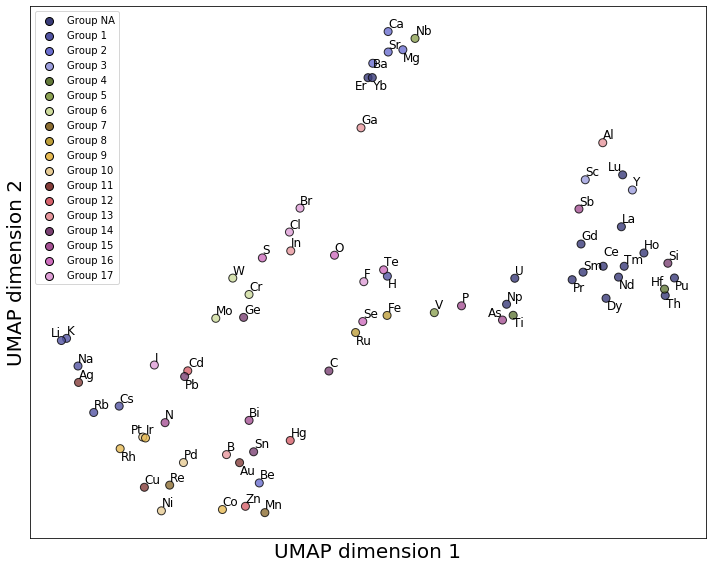

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
sc = ax.scatter(embedding[:,0], embedding[:,1], c=ptable_group_colors, s=64, ec="k", alpha=0.8, cmap="tab20b")
lp = lambda i: plt.scatter([],[],color=sc.cmap(sc.norm(i)), ec="k", s=64,
                        label="Group {:g}".format(i), marker="o")
handles = [lp(i) for i in np.unique(ptable_group_colors)]
handles[0].set_label("Group NA")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('UMAP dimension 1', fontsize=20)
ax.set_ylabel('UMAP dimension 2', fontsize=20)

plt.tight_layout()

if ADJUST_TEXT_FLAG:
    texts = []
    for i in range(74):
        texts.append(plt.annotate(atom_labels[i], (embedding[i, 0], embedding[i, 1]), size=12))

    adjustText.adjust_text(texts)

plt.legend(handles=handles)
plt.show()

#### By Periodic Table Family

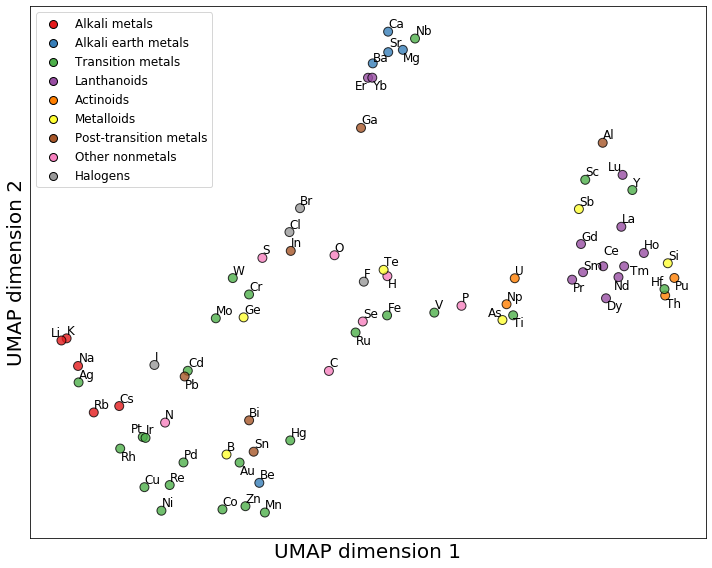

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
sc = ax.scatter(embedding[:,0], embedding[:,1], c=ptable_family_colors, ec="k", alpha=0.8, s=80, cmap="Set1")
lp = lambda i: plt.scatter([],[],color=sc.cmap(sc.norm(i)), ec="k", s=64,
                        label="{:s}".format(ptable_family_labels[i-1]), marker="o")
handles = [lp(i) for i in np.unique(ptable_family_colors)]

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('UMAP dimension 1', fontsize=20)
ax.set_ylabel('UMAP dimension 2', fontsize=20)

plt.tight_layout()

if ADJUST_TEXT_FLAG:
    texts = []
    for i in range(74):
        texts.append(plt.annotate(atom_labels[i], (embedding[i, 0], embedding[i, 1]), size=12))

    adjustText.adjust_text(texts)

plt.legend(handles=handles, loc=2, prop={'size': 12})
plt.savefig('UMAP_ptable_family_gaussian_cor.png', dpi=300, format='png')
plt.show()

#### By average partial charge

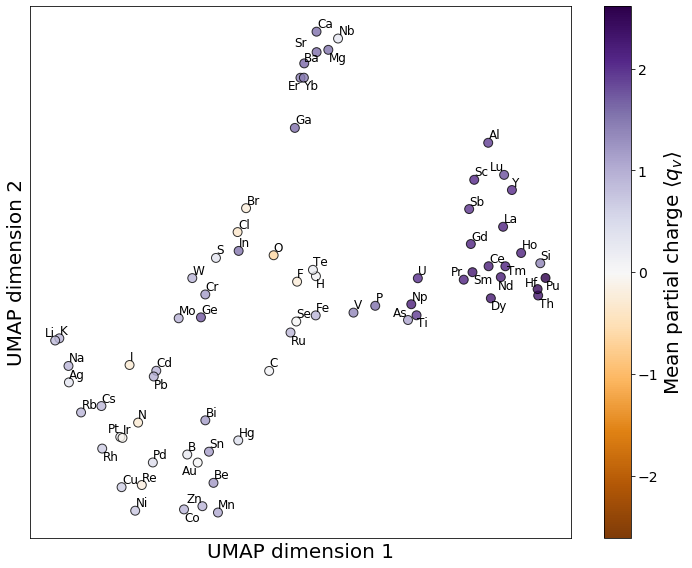

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
cmap = matplotlib.cm.PuOr
norm = matplotlib.colors.Normalize(vmin=-max(abs(mean_charges)), vmax=max(abs(mean_charges)))
sc = ax.scatter(embedding[:,0], embedding[:,1], ec="k", s=80, alpha=0.8, c=mean_charges, cmap=cmap, norm=norm)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=14) 
cbar.set_label('Mean partial charge $\\langle q_v \\rangle$', fontsize=20)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('UMAP dimension 1', fontsize=20)
ax.set_ylabel('UMAP dimension 2', fontsize=20)

plt.tight_layout()

if ADJUST_TEXT_FLAG:
    texts = []
    for i in range(74):
        texts.append(plt.annotate(atom_labels[i], (embedding[i, 0], embedding[i, 1]), size=12))

    adjustText.adjust_text(texts)

plt.savefig('UMAP_mean_charge_gaussian_cor.png', dpi=300, format='png')
plt.show()

#### By standard deviation of partial charge

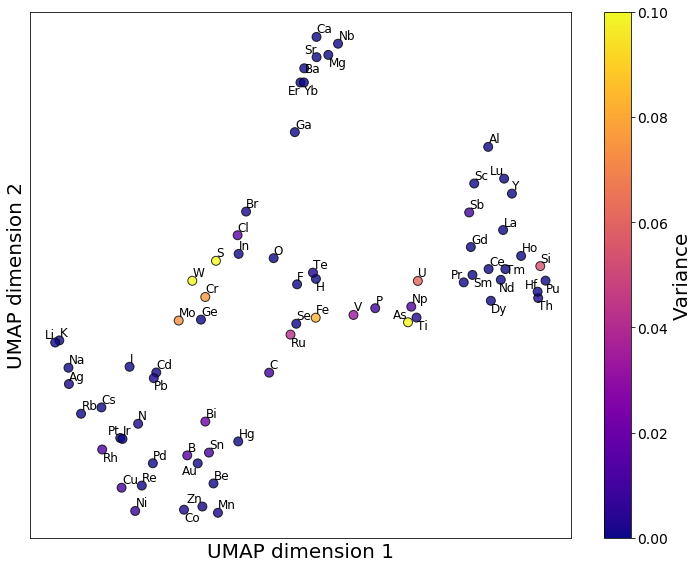

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
cmap = matplotlib.cm.plasma
norm = matplotlib.colors.Normalize(vmin=min(stdev_charges**2), vmax=max(stdev_charges**2))
sc = ax.scatter(embedding[:,0], embedding[:,1], ec="k", s=80, alpha=0.8, c=stdev_charges**2, cmap=cmap, norm=norm, vmax=0.1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=14) 
cbar.set_label('Variance', fontsize=20)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('UMAP dimension 1', fontsize=20)
ax.set_ylabel('UMAP dimension 2', fontsize=20)

plt.tight_layout()

if ADJUST_TEXT_FLAG:
    texts = []
    for i in range(74):
        texts.append(plt.annotate(atom_labels[i], (embedding[i, 0], embedding[i, 1]), size=12))

    adjustText.adjust_text(texts)

plt.savefig('UMAP_stdev_gaussian_cor.png', dpi=300, format='png')
plt.show()

#### By electronegativity

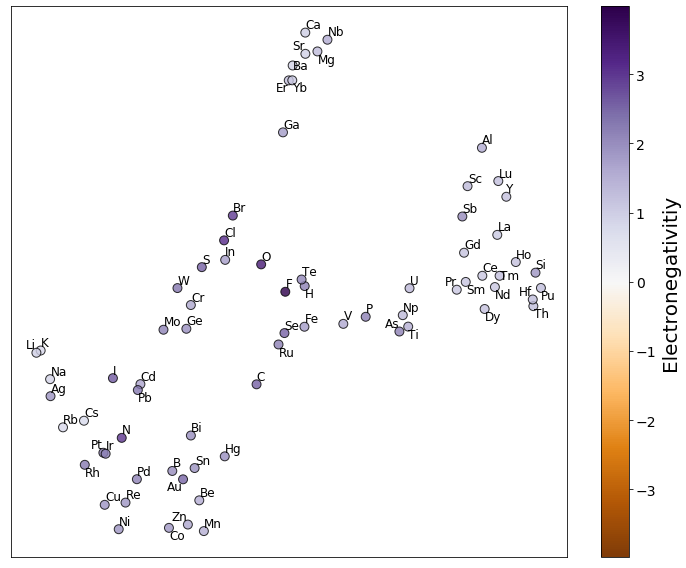

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
cmap = matplotlib.cm.PuOr
norm = matplotlib.colors.Normalize(vmin=-max(abs(electronegativities)), vmax=max(abs(electronegativities)))
sc = ax.scatter(embedding[:,0], embedding[:,1], ec="k", s=80, alpha=0.8, c=electronegativities, cmap=cmap, norm=norm)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=14) 
cbar.set_label('Electronegativitiy', fontsize=20)
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()

if ADJUST_TEXT_FLAG:
    texts = []
    for i in range(74):
        texts.append(plt.annotate(atom_labels[i], (embedding[i, 0], embedding[i, 1]), size=12))

    adjustText.adjust_text(texts)

plt.savefig('UMAP_electronegativity_gaussian_cor.png', dpi=300, format='png')
plt.show()

#### By first ionization energy

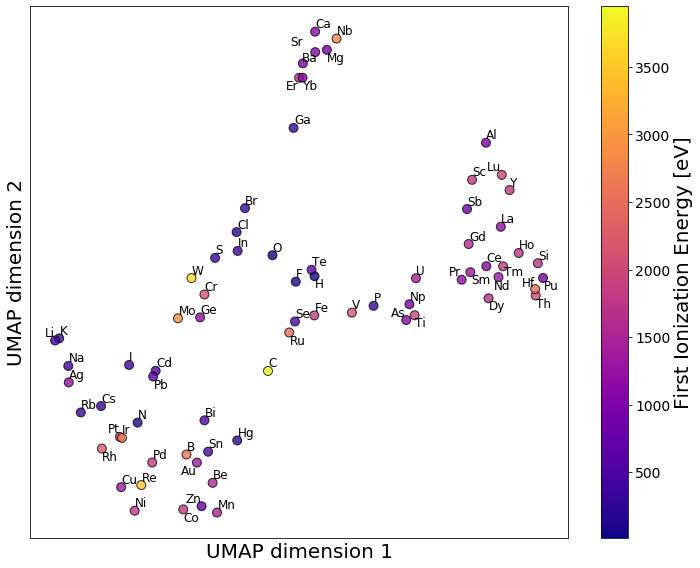

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
cmap = matplotlib.cm.plasma
norm = matplotlib.colors.Normalize(vmin=min(meltingpoint), vmax=max(meltingpoint))
sc = ax.scatter(embedding[:,0], embedding[:,1], ec="k", s=80, alpha=0.8, c=meltingpoint, cmap=cmap, norm=norm)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=14) 
cbar.set_label('First Ionization Energy [eV]', fontsize=20)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('UMAP dimension 1', fontsize=20)
ax.set_ylabel('UMAP dimension 2', fontsize=20)

plt.tight_layout()

if ADJUST_TEXT_FLAG:
    texts = []
    for i in range(74):
        texts.append(plt.annotate(atom_labels[i], (embedding[i, 0], embedding[i, 1]), size=12))

    adjustText.adjust_text(texts)

plt.savefig('UMAP_ionization_gaussian_cor.png', dpi=300, format='png')
plt.show()

# t-SNE

### Tunable paramters:

In [22]:
n_components = 2 # Default value = 2
perplexity = 7 # Default value = 30
learning_rate = 300 # Default value = 200

### t-SNE embedding

In [23]:
tsne_embedding = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate).fit_transform(embedding_to_use)

#### By Periodic Table groups

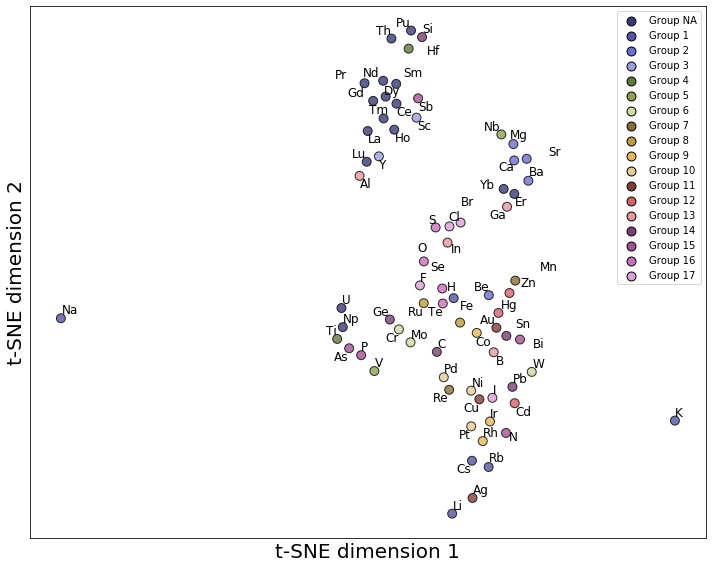

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
sc = ax.scatter(tsne_embedding[:,0], tsne_embedding[:,1], c=ptable_group_colors, s=80, ec="k", alpha=0.8, cmap="tab20b")
lp = lambda i: plt.scatter([],[],color=sc.cmap(sc.norm(i)), ec="k", s=80,
                        label="Group {:g}".format(i), marker="o")
handles = [lp(i) for i in np.unique(ptable_group_colors)]
handles[0].set_label("Group NA")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('t-SNE dimension 1', fontsize=20)
ax.set_ylabel('t-SNE dimension 2', fontsize=20)

if ADJUST_TEXT_FLAG:
    texts = []
    for i in range(74):
        texts.append(plt.annotate(atom_labels[i], (tsne_embedding[i, 0], tsne_embedding[i, 1]), size=12))

    adjustText.adjust_text(texts)
    
plt.legend(handles=handles)
plt.tight_layout()
plt.show()

#### By Periodic Table Family

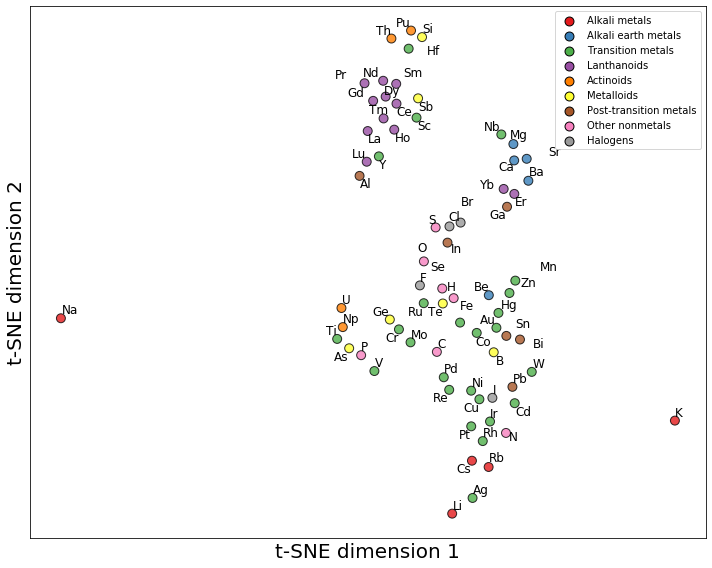

In [25]:
fig, ax = plt.subplots(figsize=(10,8))
sc = ax.scatter(tsne_embedding[:,0], tsne_embedding[:,1], c=ptable_family_colors, ec="k", alpha=0.8, s=80, cmap="Set1")
lp = lambda i: plt.scatter([],[],color=sc.cmap(sc.norm(i)), ec="k", s=80,
                        label="{:s}".format(ptable_family_labels[i-1]), marker="o")
handles = [lp(i) for i in np.unique(ptable_family_colors)]
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('t-SNE dimension 1', fontsize=20)
ax.set_ylabel('t-SNE dimension 2', fontsize=20)

if ADJUST_TEXT_FLAG:
    texts = []
    for i in range(74):
        texts.append(plt.annotate(atom_labels[i], (tsne_embedding[i, 0], tsne_embedding[i, 1]), size=12))

    adjustText.adjust_text(texts)
    
plt.legend(handles=handles)
plt.tight_layout()
plt.show()

#### By average partial charge

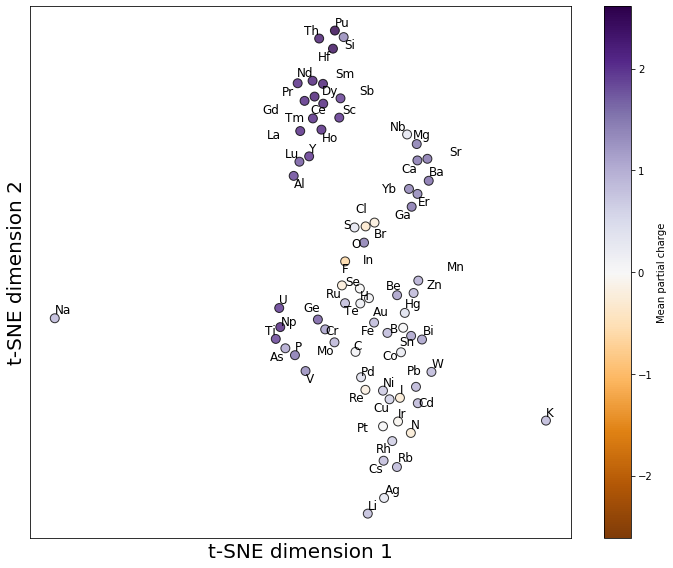

In [26]:
fig, ax = plt.subplots(figsize=(10,8))
cmap = matplotlib.cm.PuOr
norm = matplotlib.colors.Normalize(vmin=-max(abs(mean_charges)), vmax=max(abs(mean_charges)))
sc = ax.scatter(tsne_embedding[:,0], tsne_embedding[:,1], ec="k", s=80, alpha=0.8, c=mean_charges, cmap=cmap, norm=norm)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm)
cbar.set_label('Mean partial charge')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('t-SNE dimension 1', fontsize=20)
ax.set_ylabel('t-SNE dimension 2', fontsize=20)

if ADJUST_TEXT_FLAG:
    texts = []
    for i in range(74):
        texts.append(plt.annotate(atom_labels[i], (tsne_embedding[i, 0], tsne_embedding[i, 1]), size=12))

    adjustText.adjust_text(texts)
    
plt.tight_layout()
plt.show()

#### By electronegativity

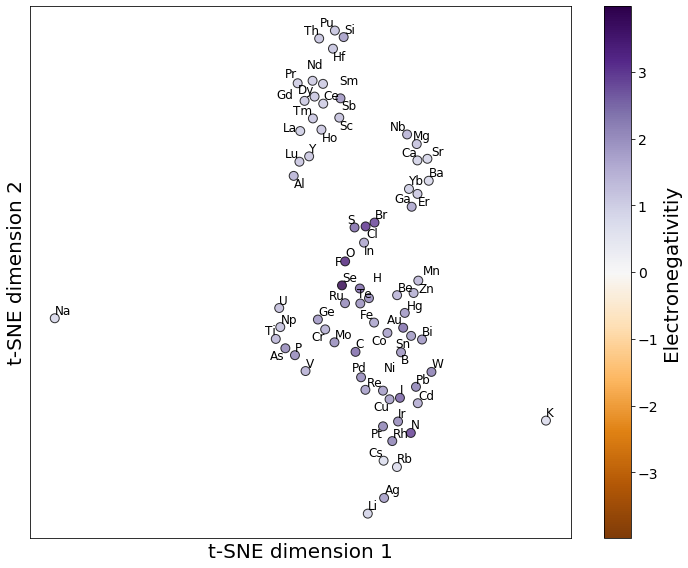

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
cmap = matplotlib.cm.PuOr
norm = matplotlib.colors.Normalize(vmin=-max(abs(electronegativities)), vmax=max(abs(electronegativities)))
sc = ax.scatter(tsne_embedding[:,0], tsne_embedding[:,1], ec="k", s=80, alpha=0.8, c=electronegativities, cmap=cmap, norm=norm)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=14) 
cbar.set_label('Electronegativitiy', fontsize=20)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('t-SNE dimension 1', fontsize=20)
ax.set_ylabel('t-SNE dimension 2', fontsize=20)

plt.tight_layout()

if ADJUST_TEXT_FLAG:
    texts = []
    for i in range(74):
        texts.append(plt.annotate(atom_labels[i], (tsne_embedding[i, 0], tsne_embedding[i, 1]), size=12))

    adjustText.adjust_text(texts)

plt.savefig('tSNE_electronegativity_gaussian_cor.png', dpi=300, format='png')
plt.show()

# PCA

### PCA embedding

In [28]:
pca = decomposition.PCA(n_components=2)
standardized_embedding = StandardScaler().fit_transform(embedding_to_use)
pca_embedding = pca.fit_transform(standardized_embedding)

In [29]:
svd_decomp = np.linalg.svd(standardized_embedding)
U, S, Vt = svd_decomp

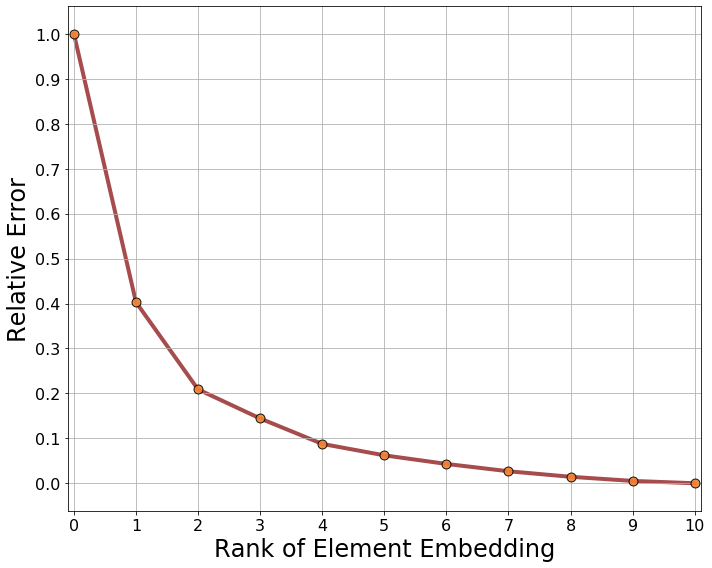

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
x = range(len(S)+1)
y = np.divide([np.sqrt([np.sum([S[i]**2 for i in range(v)]) for v in range(len(S)+1)])], np.sqrt(np.sum([s**2 for s in S])))
ax.scatter(x, 1-y, s=80, fc='#f58231', ec='k', alpha=0.9, zorder=2)
ax.plot(x, 1-y[0], lw=4, c='#800000', zorder=1, alpha=0.7)
ax.set_xlabel('Rank of Element Embedding', fontsize=24)
ax.set_ylabel('Relative Error', fontsize=24)
ax.tick_params(axis='x', labelsize=16)
ax.set_xticks(range(11))
ax.set_xlim([-0.1, 10.1])
ax.tick_params(axis='y', labelsize=16)
ax.set_yticks(np.linspace(0,1,11))
ax.grid('on')
plt.tight_layout()

#### By Periodic Table groups

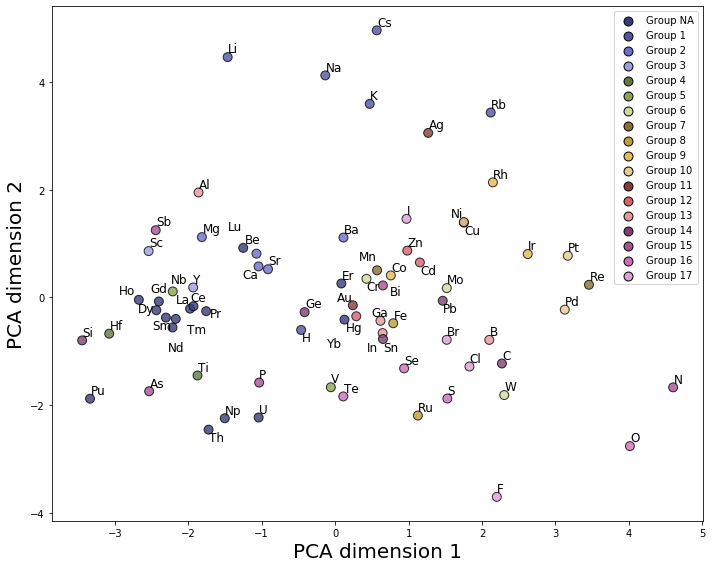

In [31]:
fig, ax = plt.subplots(figsize=(10,8))
sc = ax.scatter(pca_embedding[:,0], pca_embedding[:,1], c=ptable_group_colors, s=80, ec="k", alpha=0.8, cmap="tab20b")
lp = lambda i: plt.scatter([],[],color=sc.cmap(sc.norm(i)), ec="k", s=80,
                        label="Group {:g}".format(i), marker="o")
handles = [lp(i) for i in np.unique(ptable_group_colors)]
handles[0].set_label("Group NA")
ax.set_xlabel('PCA dimension 1', fontsize=20)
ax.set_ylabel('PCA dimension 2', fontsize=20)

if ADJUST_TEXT_FLAG:
    texts = []
    for i in range(74):
        texts.append(plt.annotate(atom_labels[i], (pca_embedding[i, 0], pca_embedding[i, 1]), size=12))

    adjustText.adjust_text(texts)
    
plt.legend(handles=handles)
plt.tight_layout()
plt.show()

#### By Periodic Table Family

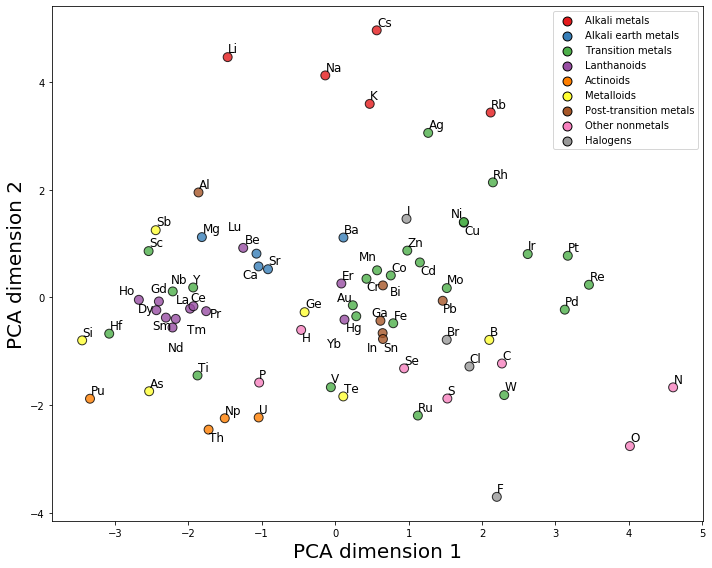

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
sc = ax.scatter(pca_embedding[:,0], pca_embedding[:,1], c=ptable_family_colors, ec="k", alpha=0.8, s=80, cmap="Set1")
lp = lambda i: plt.scatter([],[],color=sc.cmap(sc.norm(i)), ec="k", s=80,
                        label="{:s}".format(ptable_family_labels[i-1]), marker="o")
handles = [lp(i) for i in np.unique(ptable_family_colors)]
ax.set_xlabel('PCA dimension 1', fontsize=20)
ax.set_ylabel('PCA dimension 2', fontsize=20)

if ADJUST_TEXT_FLAG:
    texts = []
    for i in range(74):
        texts.append(plt.annotate(atom_labels[i], (pca_embedding[i, 0], pca_embedding[i, 1]), size=12))

    adjustText.adjust_text(texts)
    
plt.legend(handles=handles)
plt.tight_layout()
plt.show()

#### By average partial charge

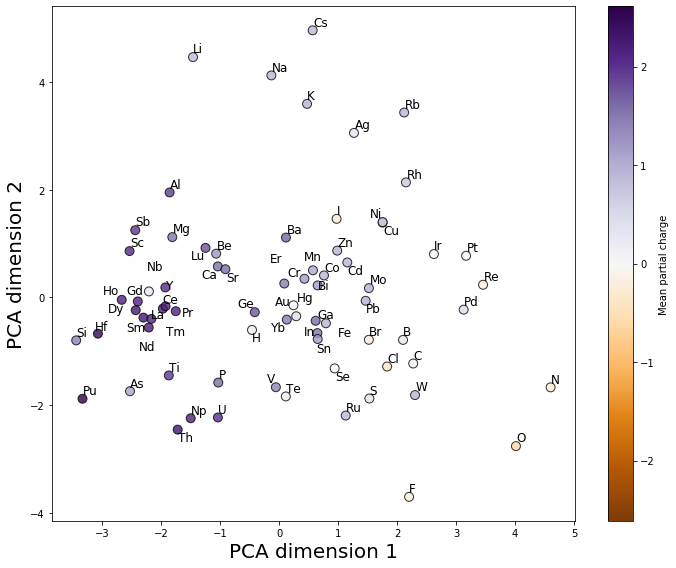

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
cmap = matplotlib.cm.PuOr
norm = matplotlib.colors.Normalize(vmin=-max(abs(mean_charges)), vmax=max(abs(mean_charges)))
sc = ax.scatter(pca_embedding[:,0], pca_embedding[:,1], ec="k", s=80, alpha=0.8, c=mean_charges, cmap=cmap, norm=norm)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm)
cbar.set_label('Mean partial charge')
ax.set_xlabel('PCA dimension 1', fontsize=20)
ax.set_ylabel('PCA dimension 2', fontsize=20)

if ADJUST_TEXT_FLAG:
    texts = []
    for i in range(74):
        texts.append(plt.annotate(atom_labels[i], (pca_embedding[i, 0], pca_embedding[i, 1]), size=12))

    adjustText.adjust_text(texts)
    
plt.tight_layout()
plt.show()

#### By electronegativity

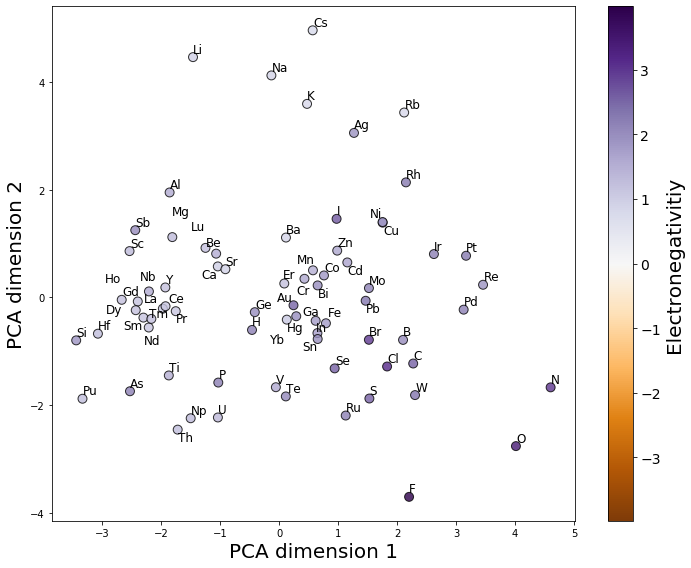

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
cmap = matplotlib.cm.PuOr
norm = matplotlib.colors.Normalize(vmin=-max(abs(electronegativities)), vmax=max(abs(electronegativities)))
sc = ax.scatter(pca_embedding[:,0], pca_embedding[:,1], ec="k", s=80, alpha=0.8, c=electronegativities, cmap=cmap, norm=norm)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=14) 
cbar.set_label('Electronegativitiy', fontsize=20)
ax.set_xlabel('PCA dimension 1', fontsize=20)
ax.set_ylabel('PCA dimension 2', fontsize=20)

plt.tight_layout()

if ADJUST_TEXT_FLAG:
    texts = []
    for i in range(74):
        texts.append(plt.annotate(atom_labels[i], (pca_embedding[i, 0], pca_embedding[i, 1]), size=12))

    adjustText.adjust_text(texts)

plt.savefig('PCA_electronegativity_gaussian_cor.png', dpi=300, format='png')
plt.show()

#### By first ionization energy

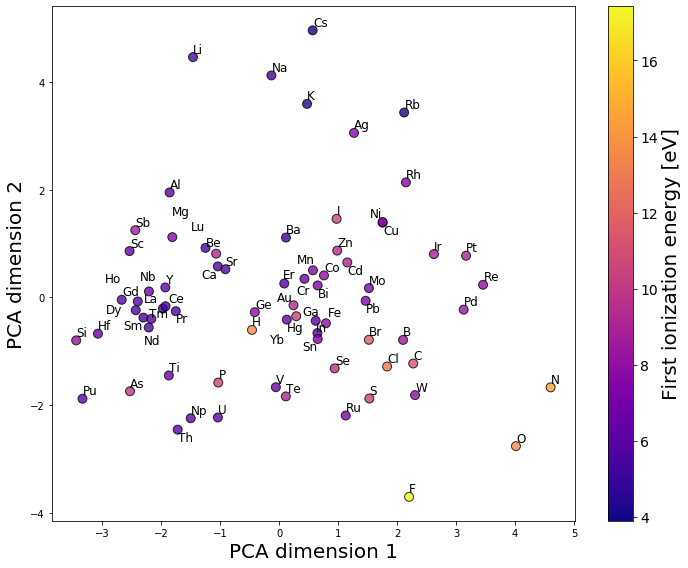

In [35]:
fig, ax = plt.subplots(figsize=(10,8))
cmap = matplotlib.cm.plasma
norm = matplotlib.colors.Normalize(vmin=min(ionization_energy), vmax=max(ionization_energy))
sc = ax.scatter(pca_embedding[:,0], pca_embedding[:,1], ec="k", s=80, alpha=0.8, c=ionization_energy, cmap=cmap, norm=norm)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=14) 
cbar.set_label('First ionization energy [eV]', fontsize=20)
ax.set_xlabel('PCA dimension 1', fontsize=20)
ax.set_ylabel('PCA dimension 2', fontsize=20)

plt.tight_layout()

if ADJUST_TEXT_FLAG:
    texts = []
    for i in range(74):
        texts.append(plt.annotate(atom_labels[i], (pca_embedding[i, 0], pca_embedding[i, 1]), size=12))

    adjustText.adjust_text(texts)

plt.savefig('PCA_ionization_gaussian_cor.png', dpi=300, format='png')
plt.show()

#### By density

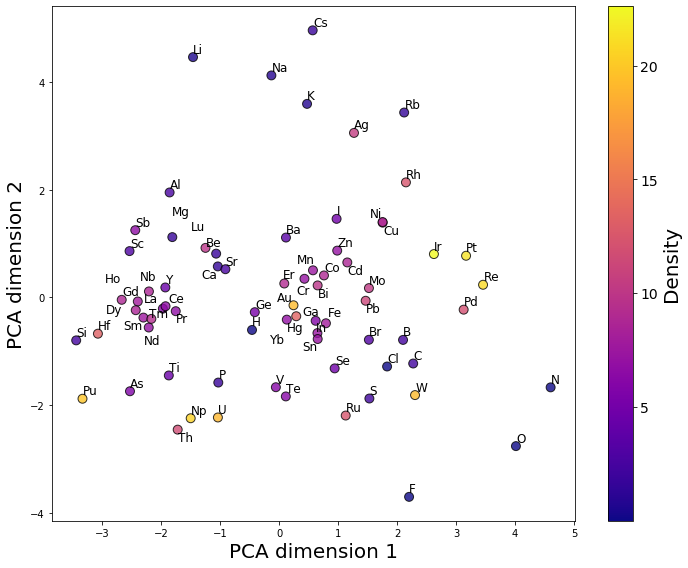

In [36]:
fig, ax = plt.subplots(figsize=(10,8))
cmap = matplotlib.cm.plasma
norm = matplotlib.colors.Normalize(vmin=min(density), vmax=max(density))
sc = ax.scatter(pca_embedding[:,0], pca_embedding[:,1], ec="k", s=80, alpha=0.8, c=density, cmap=cmap, norm=norm)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=14) 
cbar.set_label('Density', fontsize=20)
ax.set_xlabel('PCA dimension 1', fontsize=20)
ax.set_ylabel('PCA dimension 2', fontsize=20)

plt.tight_layout()

if ADJUST_TEXT_FLAG:
    texts = []
    for i in range(74):
        texts.append(plt.annotate(atom_labels[i], (pca_embedding[i, 0], pca_embedding[i, 1]), size=12))

    adjustText.adjust_text(texts)

plt.savefig('PCA_density_gaussian_cor.png', dpi=300, format='png')
plt.show()

#### By standard deviation of partial charge

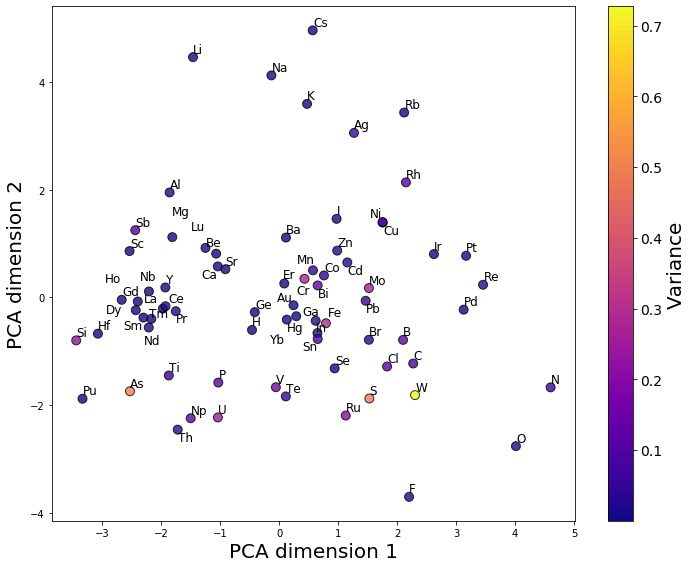

In [37]:
fig, ax = plt.subplots(figsize=(10,8))
cmap = matplotlib.cm.plasma
norm = matplotlib.colors.Normalize(vmin=min(stdev_charges), vmax=max(stdev_charges))
sc = ax.scatter(pca_embedding[:,0], pca_embedding[:,1], ec="k", s=80, alpha=0.8, c=stdev_charges, cmap=cmap, norm=norm)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=14) 
cbar.set_label('Variance', fontsize=20)
ax.set_xlabel('PCA dimension 1', fontsize=20)
ax.set_ylabel('PCA dimension 2', fontsize=20)

plt.tight_layout()

if ADJUST_TEXT_FLAG:
    texts = []
    for i in range(74):
        texts.append(plt.annotate(atom_labels[i], (pca_embedding[i, 0], pca_embedding[i, 1]), size=12))

    adjustText.adjust_text(texts)

plt.savefig('PCA_stdev_gaussian_cor.png', dpi=300, format='png')
plt.show()